In [1]:
import sys
import os
os.chdir("..")
os.chdir("./src")
# sys.path.append("./src")

In [2]:
from IPython import display
from IPython.display import clear_output
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
from numba import njit, jit
from time import time
# from helpers import *
from LDMIBSS import *
# np.random.seed(13)
%load_ext autoreload
%autoreload 2

In [3]:
N = 10000
NumberofSources = 5
NumberofMixtures = 8
S = generate_correlated_copula_sources(rho = 0.4, df = 4, n_sources = NumberofSources, 
                                       size_sources = N , decreasing_correlation = False)
S = 2 * S -1 
print("The following is the correlation matrix of sources")
display_matrix(np.corrcoef(S))

# Generate Mxr random mixing from i.i.d N(0,1)
A = np.random.randn(NumberofMixtures,NumberofSources)
X = np.dot(A,S)

SNR = 30 # dB
NoiseAmp = (10 ** (-SNR/20))# * np.sqrt(NumberofSources)
NoisePart = NoiseAmp * np.random.randn(X.shape[0], X.shape[1])
X = X  + NoisePart
SNRinp = 10 * np.log10(np.sum(np.var(X, axis = 1)) / np.sum(np.var(NoisePart, axis = 1)))
print("The following is the mixture matrix A")
display_matrix(A)
print("Input SNR is : {}".format(SNRinp))

The following is the correlation matrix of sources


<IPython.core.display.Math object>

The following is the mixture matrix A


<IPython.core.display.Math object>

Input SNR is : 32.69591592433444


In [4]:
s_dim = S.shape[0]
x_dim = X.shape[0]
debug_iteration_point = 200
model = LDMIBSS(s_dim = s_dim, x_dim = x_dim,
                set_ground_truth = True, S = S, A = A)

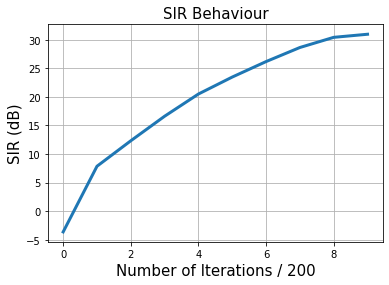

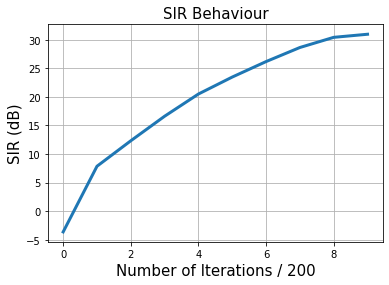

In [5]:
model.fit_batch_antisparse(X, epsilon = 1e-3, mu_start = 100
                           ,n_iterations = 2000, debug_iteration_point = debug_iteration_point,
                           plot_in_jupyter = True)

In [6]:
W = model.W
Y = W @ X
10 * np.log10(CalculateSINR(Y, S)[0])

26.548899542620106